<a href="https://colab.research.google.com/github/Hiteshb13/Python-is-easy-by-pirple.com/blob/main/Assignment_2_HiteshBhardwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Connecting to Drive**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2.Installing Keras Tuner for Collab**

In [4]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


# **3.Importing Necessary Packages**

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **4. Load the Fashion MNIST dataset for image classification**

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# **5. MLP Model Creation and Splitting the datasets**

(60000, 28, 28)



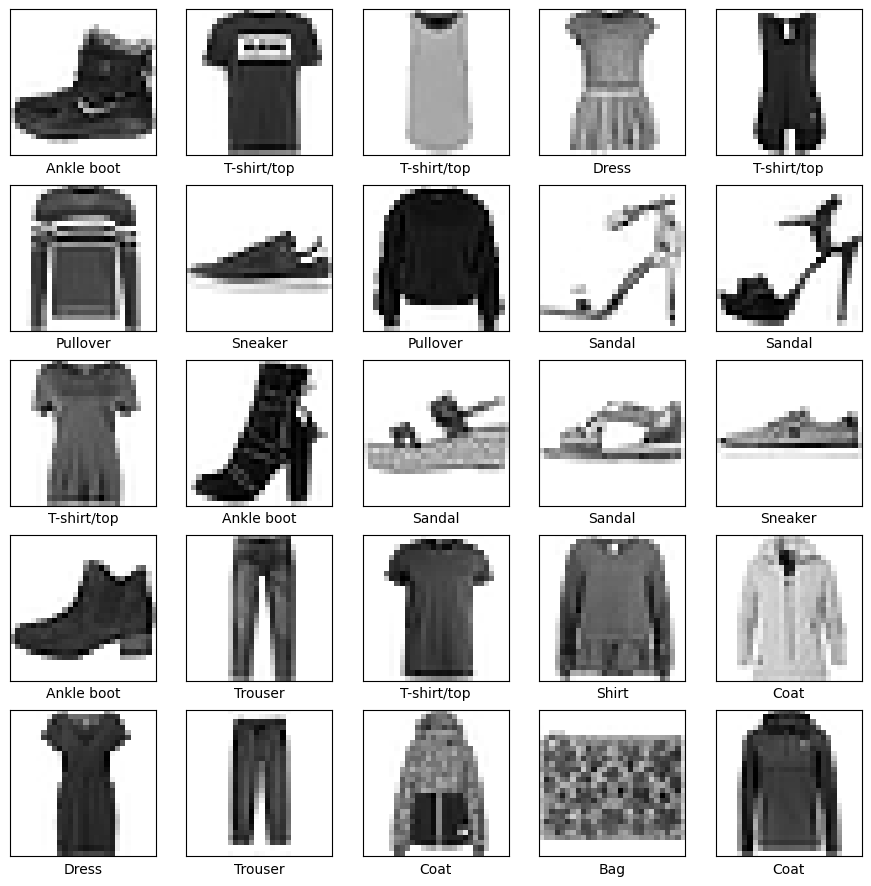

In [7]:
print(X_train_full.shape)

print()

#Defining validation, Test set
assert len(X_train_full) == len(y_train_full), "Number of samples in X_train and y_train must match."
X_train_full = X_train_full.astype('float32') / 255.0
X_test= X_test.astype('float32') / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, stratify=y_train_full,random_state = 42)

# We define class names as this dataset is a collection of articles of clothing

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Creating a Model with two hidden layers

neurons_hidden_1 = 300
neurons_hidden_2 = 100
neurons_hidden_3 = 10

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(neurons_hidden_1, activation='relu'),
    keras.layers.Dense(neurons_hidden_2, activation='relu'),
    keras.layers.Dense(neurons_hidden_3, activation='softmax')
])

plt.figure(figsize=(11,11))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()


# **6.Shuffling the feature of image column wise**

In [8]:
def shuffle_features_column_wise(X):
    X_shuffled = []
    for image in X:
        # Flatten the image
        flattened_image = image.flatten()
        shuffled_flattened_image = shuffle(flattened_image, random_state=42)
        # Reshape the shuffled flattened image back to its original shape
        shuffled_image = shuffled_flattened_image.reshape(image.shape)
        X_shuffled.append(shuffled_image)
    return np.array(X_shuffled)

# Shuffle features column-wise for train, validation, and test sets
X_train_shuffled = shuffle_features_column_wise(X_train)
X_valid_shuffled = shuffle_features_column_wise(X_valid)
X_test_shuffled = shuffle_features_column_wise(X_test)


# **7.Plots**

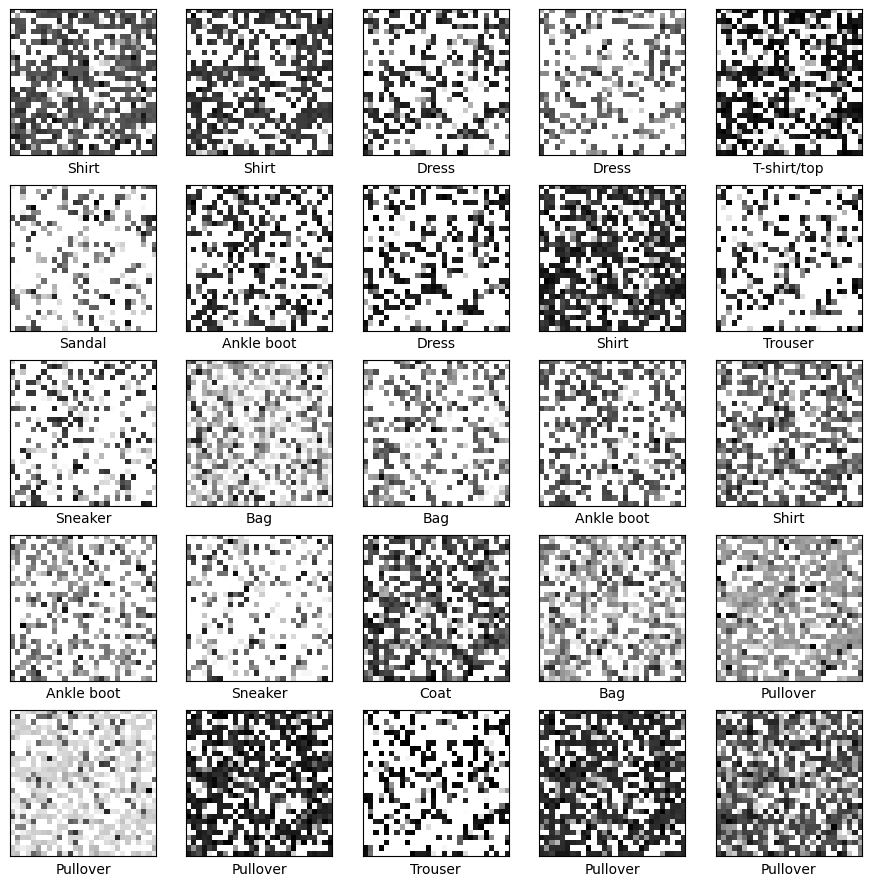

In [9]:
plt.figure(figsize=(11, 11))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_shuffled[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])  # Use original labels here
plt.show()

* Here we can visualize that the pixels of the images are shuffled, therefore we are getting unclear pictures here.

In [10]:
#Checking if features are shuffled or not
if np.array_equal(X_train, X_train_shuffled):
    print("Features are not shuffled.")
else:
    print("Features are shuffled.")

Features are shuffled.


#**8.Training the model 3 times with 3 epochs**

In [11]:
tf.random.set_seed(42)
np.random.seed(42)
def Structure():
    neurons_hidden_1 = 300
    neurons_hidden_2 = 100
    neurons_hidden_3 = 10

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(neurons_hidden_1, activation='relu'),
        keras.layers.Dense(neurons_hidden_2, activation='relu'),
        keras.layers.Dense(neurons_hidden_3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = Structure()

# Training the model

histories = []

# Compile and train the model three times
for i in range(3):
    print(f"Training Model {i+1}")

    # Create the model
    model = Structure()

    # Training the model
    history = model.fit(X_train_shuffled, y_train, epochs=3, validation_data=(X_valid_shuffled, y_valid))

    # Append the history to the list
    histories.append(history)

Training Model 1
Epoch 1/3
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4991 - accuracy: 0.8192 - val_loss: 0.4414 - val_accuracy: 0.8338
Epoch 2/3
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3696 - accuracy: 0.8645 - val_loss: 0.3460 - val_accuracy: 0.8746
Epoch 3/3
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3322 - accuracy: 0.8779 - val_loss: 0.3423 - val_accuracy: 0.8745
Training Model 2
Epoch 1/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4969 - accuracy: 0.8189 - val_loss: 0.4597 - val_accuracy: 0.8306
Epoch 2/3
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3707 - accuracy: 0.8631 - val_loss: 0.3429 - val_accuracy: 0.8727
Epoch 3/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3346 - accuracy: 0.8764 - val_loss: 0.3690 - val_accuracy: 0.8677
Training Model 3
Epoch 1/3
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4973 -

#**9.Plotting Loss and Accuracy for all three runs**

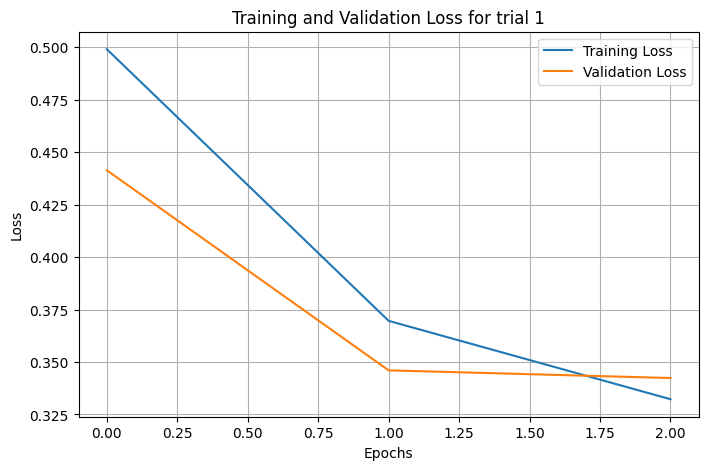

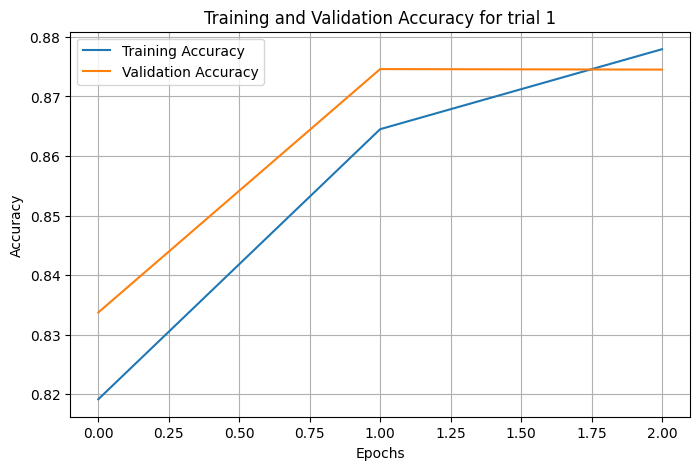

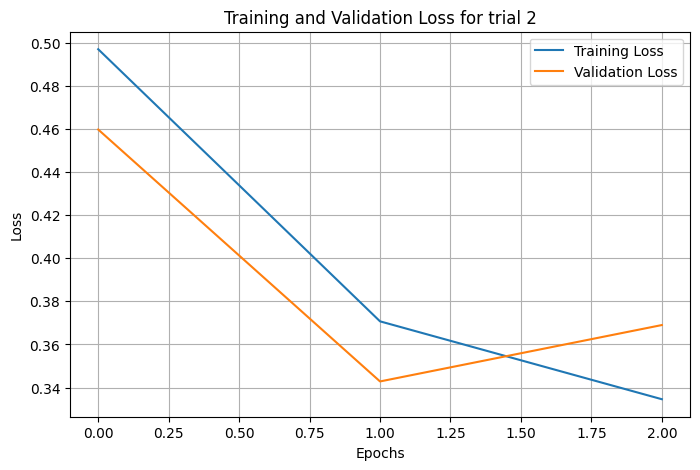

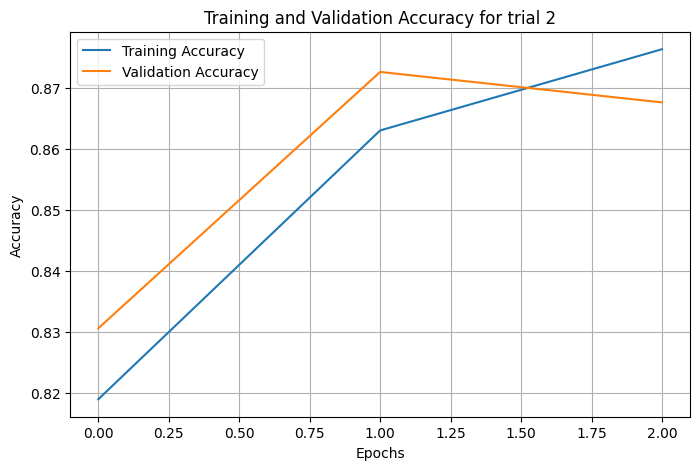

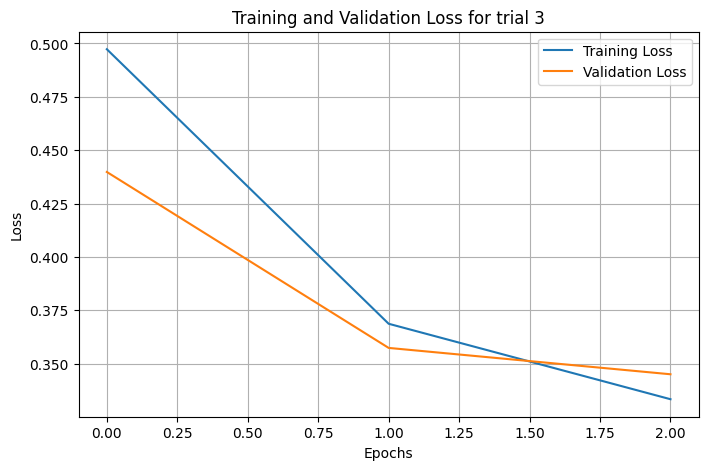

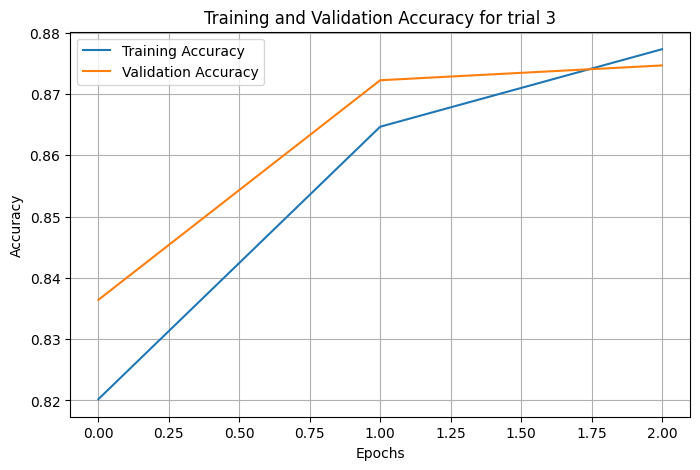

In [12]:
# Plotting Loss and Accuracy for all three runs
for i, history in enumerate(histories, start=1):
    # Plot Loss
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for trial {i}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for trial {i}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

Inference run in the test set and computing the metrics for testing.

In [13]:
test_loss, test_acc = model.evaluate(X_test_shuffled,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3883 - accuracy: 0.8621 - 898ms/epoch - 3ms/step

Test accuracy: 0.8621000051498413


#**10.Test Samples**

313/313 [==============================] - 1s 3ms/step


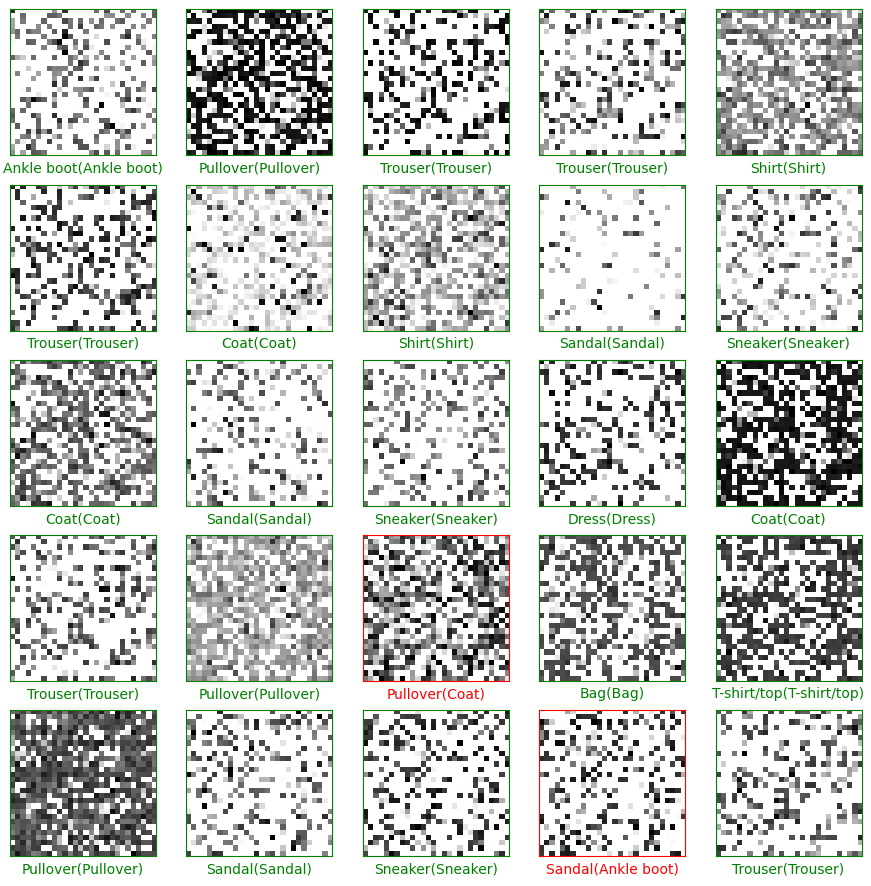

In [14]:
predictions = model.predict(X_test_shuffled)

plt.figure(figsize=(11,11))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test_shuffled[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]

    if predicted_label == true_label:
        color ='green'
    else:
        color = 'red'

    plt.gca().spines['top'].set_color(color)
    plt.gca().spines['bottom'].set_color(color)
    plt.gca().spines['left'].set_color(color)
    plt.gca().spines['right'].set_color(color)

    plt.xlabel("{}({})".format(class_names[predicted_label], class_names[true_label]), color=color)

plt.show()


#**11.Testing with New images**

1/1 [==============================] - 0s 87ms/step
Predictions: Bag


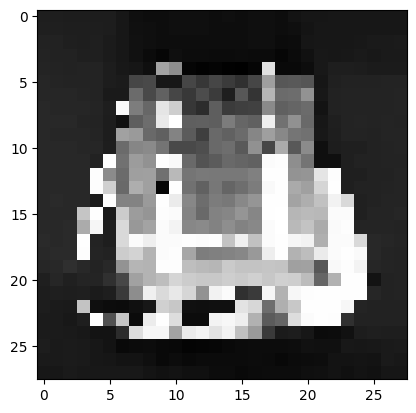

In [15]:
import cv2
predictions = model.predict(X_test_shuffled)

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Converting to  grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (28, 28))
    resized_image = 255 - resized_image
    normalized_image = resized_image / 255.0

    # Reshaping the image to match the Fashion MNIST format
    final_image = np.expand_dims(normalized_image, axis=-1)

    return final_image

image_path1 = '/content/drive/MyDrive/DeepLearning_Course/Task0/Bag.jpg'
fashion_mnist_image1 = preprocess_image(image_path1)

plt.imshow(fashion_mnist_image1, cmap ='gray')

predictions = model.predict(fashion_mnist_image1.reshape(1, 28, 28, 1))

cls = np.argmax(predictions[0])
print("Predictions:", class_names[cls])


1/1 [==============================] - 0s 24ms/step
Predictions: Bag


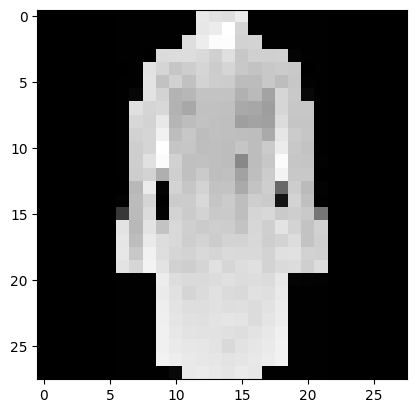

In [16]:
image_path2  = '/content/drive/MyDrive/DeepLearning_Course/Task0/Coat.jpg'
fashion_mnist_image2 = preprocess_image(image_path2)

predictions = model.predict(fashion_mnist_image2.reshape(1, 28, 28, 1))

cls = np.argmax(predictions[0])
print("Predictions:", class_names[cls])
plt.imshow(fashion_mnist_image2, cmap ='gray')


#**12.Now,Checking for Previous Model**
  **Training the Model**

In [17]:
tf.random.set_seed(42)
np.random.seed(42)
def Structure():
    neurons_hidden_1 = 300
    neurons_hidden_2 = 100
    neurons_hidden_3 = 10

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(neurons_hidden_1, activation='relu'),
        keras.layers.Dense(neurons_hidden_2, activation='relu'),
        keras.layers.Dense(neurons_hidden_3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = Structure()

# Training the model

histories1 = []

# Compile and train the model three times
for i in range(3):
    print(f"Training Model {i+1}")

    # Create the model
    model = Structure()

    # Training the model
    history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

    # Append the history to the list
    histories1.append(history)

Training Model 1
Epoch 1/3
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4963 - accuracy: 0.8202 - val_loss: 0.4201 - val_accuracy: 0.8435
Epoch 2/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3696 - accuracy: 0.8649 - val_loss: 0.3406 - val_accuracy: 0.8746
Epoch 3/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3340 - accuracy: 0.8766 - val_loss: 0.3604 - val_accuracy: 0.8698
Training Model 2
Epoch 1/3
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5015 - accuracy: 0.8190 - val_loss: 0.4357 - val_accuracy: 0.8378
Epoch 2/3
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3723 - accuracy: 0.8627 - val_loss: 0.3428 - val_accuracy: 0.8747
Epoch 3/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3334 - accuracy: 0.8772 - val_loss: 0.3555 - val_accuracy: 0.8705
Training Model 3
Epoch 1/3
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5010 - 

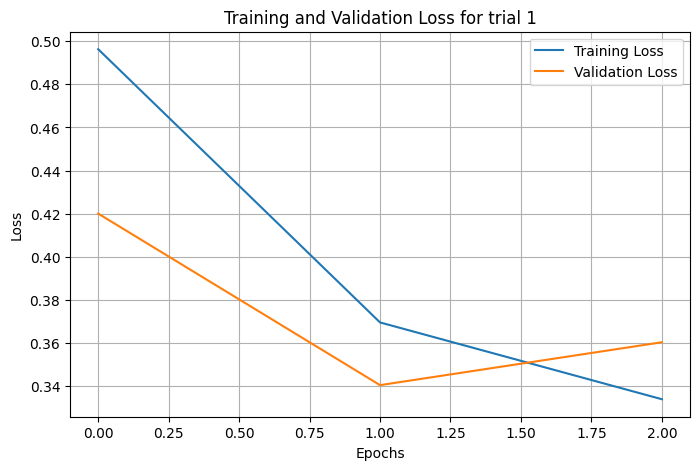

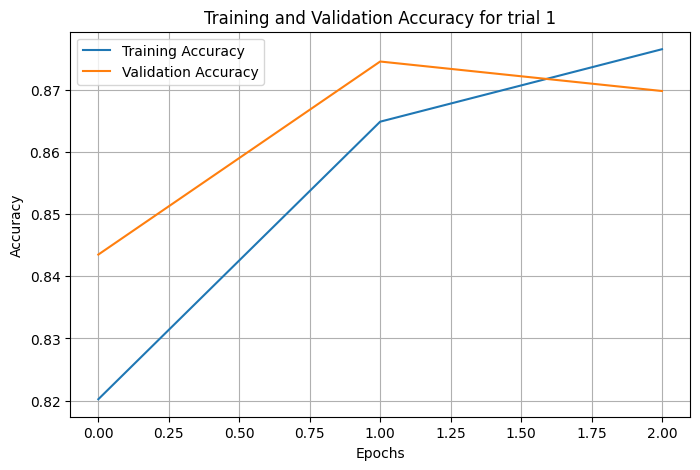

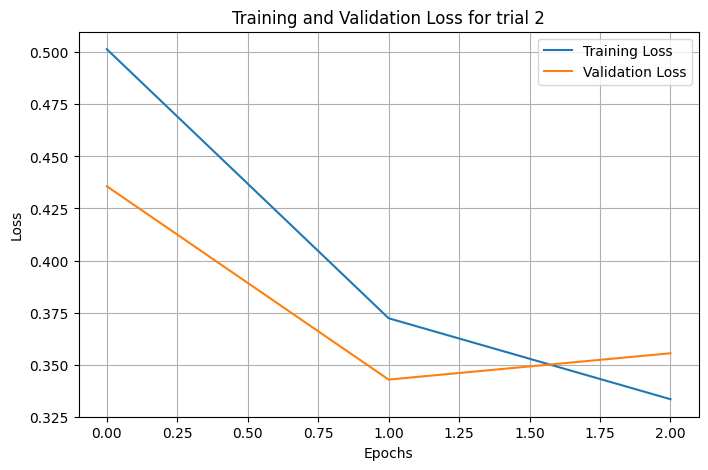

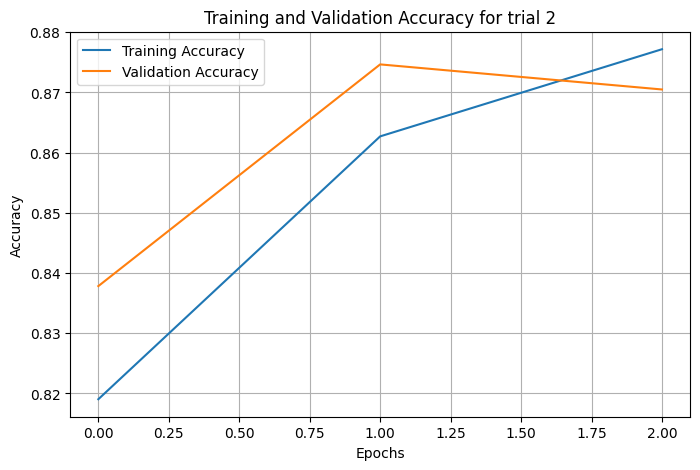

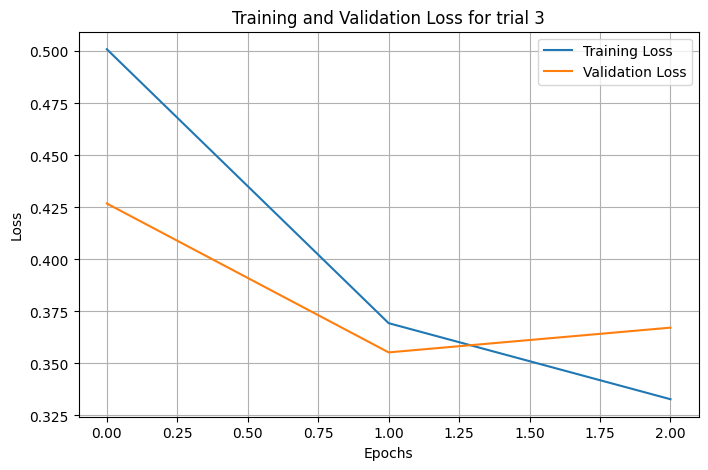

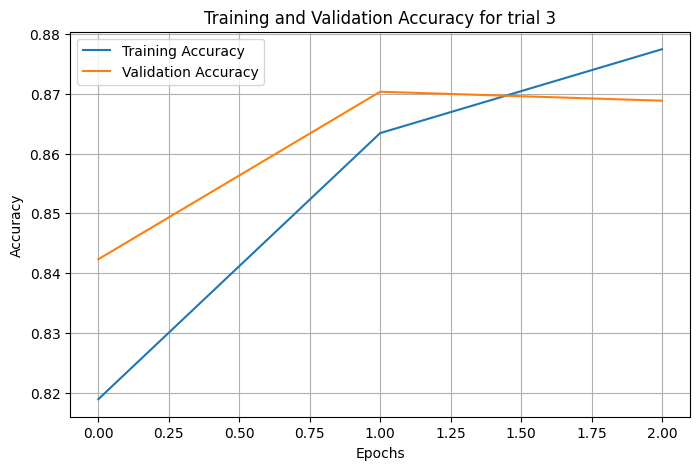

In [18]:
# Plotting Loss and Accuracy for all three runs
for i, history in enumerate(histories1, start=1):
    # Plot Loss
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for trial {i}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for trial {i}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

 * So here while looking at all the plots for both shuffled features and original dataset, we can not see a lot of changes in the plots, plots are almost similar.



* Testing Accuracy is also same for the scenarios,it is between 86 - 87.

In [19]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4112 - accuracy: 0.8578 - 875ms/epoch - 3ms/step

Test accuracy: 0.8578000068664551


#**13.Test Samples**

313/313 [==============================] - 1s 4ms/step


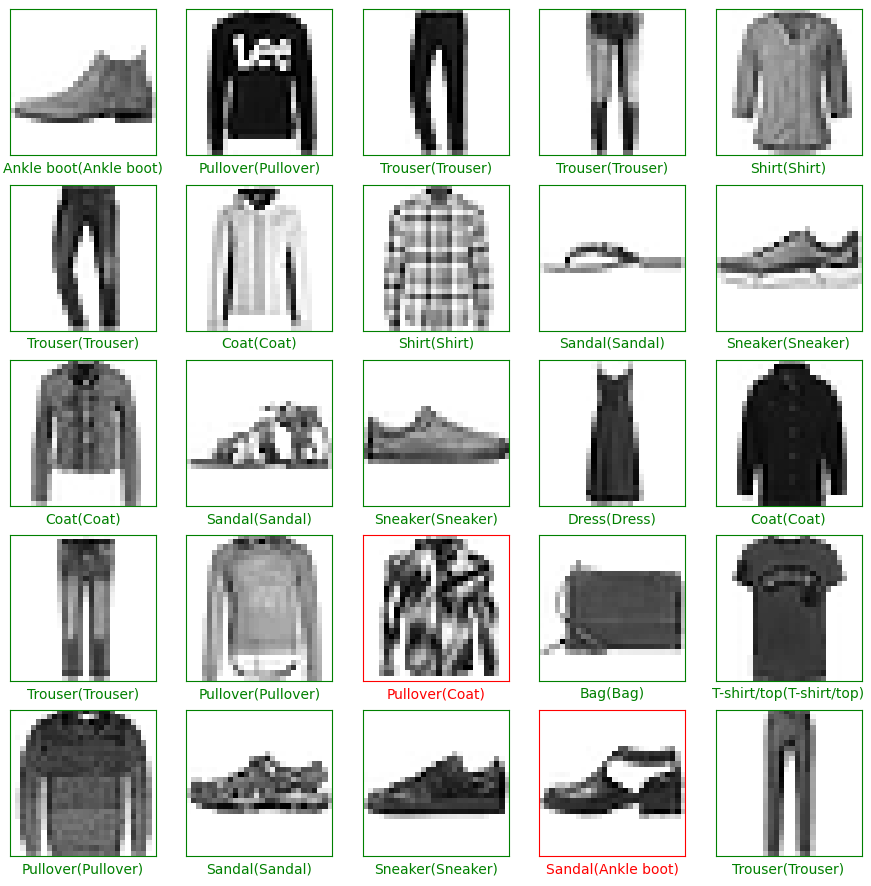

In [20]:
predictions = model.predict(X_test)

plt.figure(figsize=(11,11))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]

    if predicted_label == true_label:
        color ='green'
    else:
        color = 'red'

    plt.gca().spines['top'].set_color(color)
    plt.gca().spines['bottom'].set_color(color)
    plt.gca().spines['left'].set_color(color)
    plt.gca().spines['right'].set_color(color)

    plt.xlabel("{}({})".format(class_names[predicted_label], class_names[true_label]), color=color)

plt.show()


#**14.Testing with new image**

1/1 [==============================] - 0s 74ms/step
Predictions: Coat


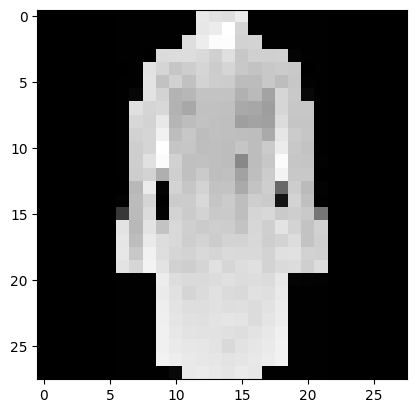

In [21]:
import cv2
predictions = model.predict(X_test)

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    # Converting to  grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (28, 28))
    resized_image = 255 - resized_image
    normalized_image = resized_image / 255.0

    # Reshaping the image to match the Fashion MNIST format
    final_image = np.expand_dims(normalized_image, axis=-1)

    return final_image

image_path1 = '/content/drive/MyDrive/DeepLearning_Course/Task0/Coat.jpg'
fashion_mnist_image1 = preprocess_image(image_path1)

plt.imshow(fashion_mnist_image1, cmap ='gray')

predictions = model.predict(fashion_mnist_image1.reshape(1, 28, 28, 1))

cls = np.argmax(predictions[0])
print("Predictions:", class_names[cls])


# **Conclusion**
* Shuffling the pixel values within each image typically has no or minimal impact on model performance, which we have observed above, we can clearly see it from validation loss, validation accuracy and Training loss, Training accuracy which are somehow similar.

* While Refencing the testing dataset, it delivers same accuracy in both the cases.
